5 folds의 개별 Negative MSE scores :  [-11.422 -24.294 -28.144 -74.599 -28.517]
5 folds의 개별 RMSE scores :  [3.38  4.929 5.305 8.637 5.34 ]
5 folds의 평균 RMSE : 5.518


alpha가 0 일 때 5 folds의 평균 RMSE : 5.829
alpha가 0.1 일 때 5 folds의 평균 RMSE : 5.788
alpha가 1 일 때 5 folds의 평균 RMSE : 5.653
alpha가 10 일 때 5 folds의 평균 RMSE : 5.518
alpha가 100 일 때 5 folds의 평균 RMSE : 5.330


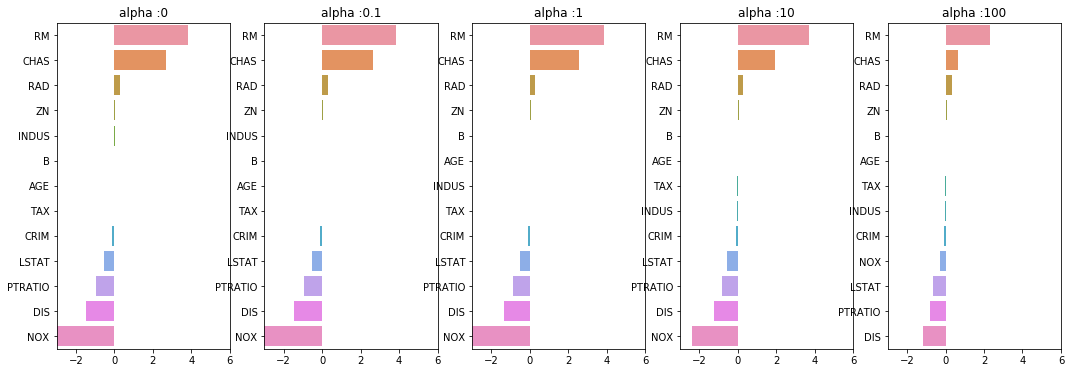

,alpha :0,alpha :0.1,alpha :1,alpha :10,alpha :100
RM,3.809865,3.818233,3.854000,3.702272,2.334536
CHAS,2.686734,2.670019,2.552393,1.952021,0.638335
RAD,0.306049,0.303515,0.290142,0.279596,0.315358
ZN,0.046420,0.046572,0.047443,0.049579,0.054496
INDUS,0.020559,0.015999,-0.008805,-0.042962,-0.052826
B,0.009312,0.009368,0.009673,0.010037,0.009393
AGE,0.000692,-0.000269,-0.005415,-0.010707,0.001212
TAX,-0.012335,-0.012421,-0.012912,-0.013993,-0.015856
CRIM,-0.108011,-0.107474,-0.104595,-0.101435,-0.102202
LSTAT,-0.524758,-0.525966,-0.533343,-0.559366,-0.660764


In [38]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


# 보스턴 데이터 이용
# alpha를 10으로 설정

boston = load_boston()

bostonDF = pd.DataFrame(boston.data, columns = boston.feature_names)
bostonDF['PRICE'] = boston.target

X_data = bostonDF.iloc[:, :-1]
y_target = bostonDF.iloc[:, -1]



ridge = Ridge(alpha = 10)
neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring = "neg_mean_squared_error", cv = 5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)


print('5 folds의 개별 Negative MSE scores : ', np.round(neg_mse_scores,3))
print('5 folds의 개별 RMSE scores : ', np.round(rmse_scores,3))
print('5 folds의 평균 RMSE : {:.3f}'.format(avg_rmse))
print('\n')
# 앞선 linear regression의 RMSE보다 낮은 값을 가진 것을 알 수 있다.

# alpha의 변화에 따른 회귀 계수 값 변화 측정.

alphas = [0, 0.1, 1, 10, 100]

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring = "neg_mean_squared_error", cv = 5)
    avg_rmse = np.mean(np.sqrt(-1*neg_mse_scores))
    print('alpha가 {} 일 때 5 folds의 평균 RMSE : {:.3f}'.format(alpha, avg_rmse))
    
# alpha값이 커질수록 평균 RMSE값이 작아지는 것을 볼 수 있다.

fig, axs = plt.subplots(figsize=(18,6), nrows=1, ncols=5)
coeff_df = pd.DataFrame()

for pos, alpha in enumerate(alphas):
    ridge = Ridge(alpha = alpha)
    ridge.fit(X_data, y_target)
    
#     alpha에 따른 피처별로 회귀 계수를 Series로 변환하고 이를 DataFrame의 칼럼으로 추가
    coeff = pd.Series(data=ridge.coef_, index=X_data.columns)
    colname = 'alpha :'+str(alpha)
    coeff_df[colname] = coeff
    
#     막대 그래프로 각 alpha 값에서의 회귀 계수를 시각화
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3,6)
    sns.barplot(x=coeff.values, y=coeff.index, ax=axs[pos])
    
plt.show()

# alpha값이 증가할수록, 회귀계수의 값들이 작아진다. 

ridge_alphas = [0 , 0.1 , 1 , 10 , 100]
sort_column = 'alpha :'+str(ridge_alphas[0])
coeff_df.sort_values(by=sort_column, ascending=False)

# fl